# Importing Libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [18]:
df=pd.read_excel('advertising_sales_data.xlsx')

# Average Amount spent on TV advertising

In [19]:
tv=df.iloc[:,1].values # Since, TV advertising in the index 1
print(np.average(tv))

147.0425


# Data Preprocessing

In [20]:
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values


In [21]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,1:4])
X[:,1:4]=imputer.transform(X[:,1:4])


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

# Correlation between radio advertising expenditure and product sale

In [23]:
corr=np.corrcoef(X[:,1],y)
print(corr)


[[1.         0.34965074]
 [0.34965074 1.        ]]


**Graph**

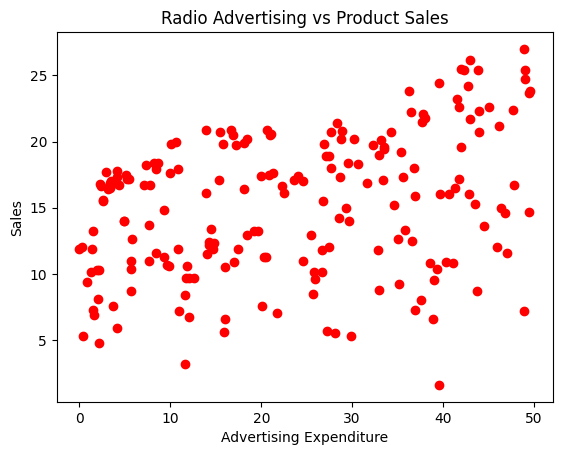

In [24]:
exp=df.iloc[:,2].values
sale=df.iloc[:,-1].values
plt.scatter(exp,sale,color='red')
plt.xlabel('Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Radio Advertising vs Product Sales')
plt.show()

# Multiple Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred=regressor.predict(X_test)

# Importance of Each feature

<Axes: ylabel='Feature'>

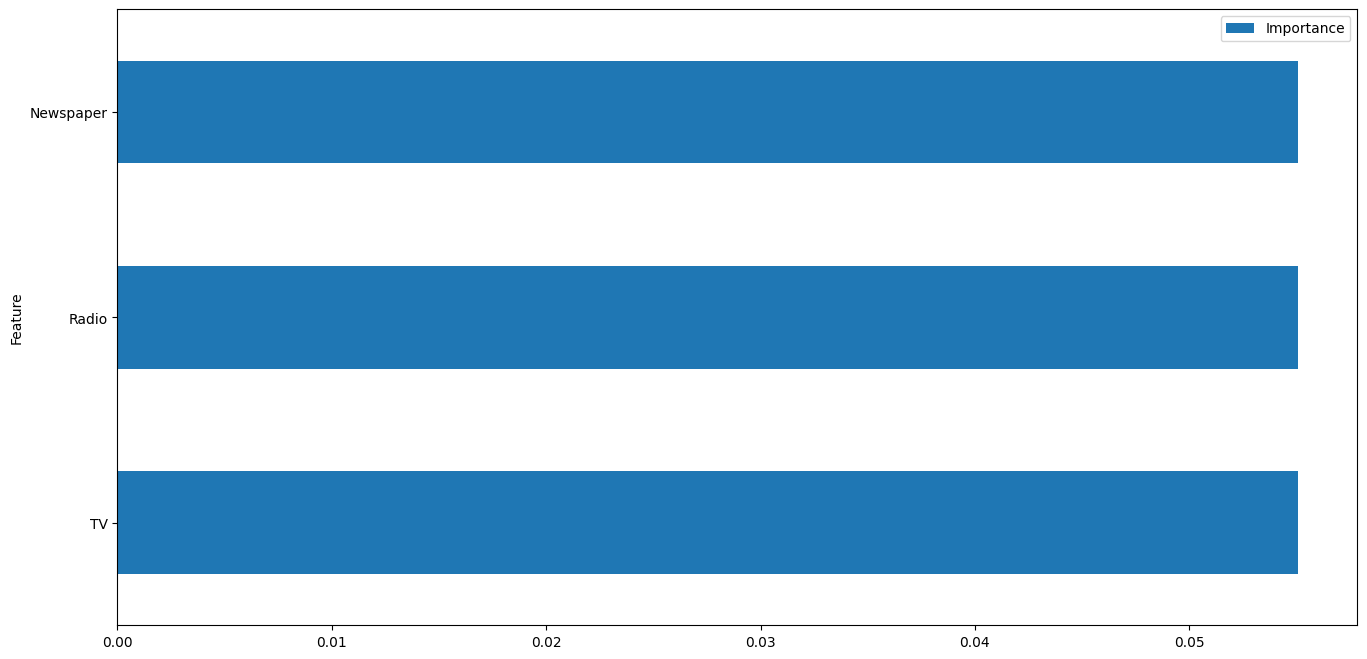

In [27]:
coefficients = regressor.coef_[0]
X1=df.iloc[:,1:-1]
feature_importance = pd.DataFrame({'Feature': X1.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(16, 8))

# Visualising the model


<function matplotlib.pyplot.show(close=None, block=None)>

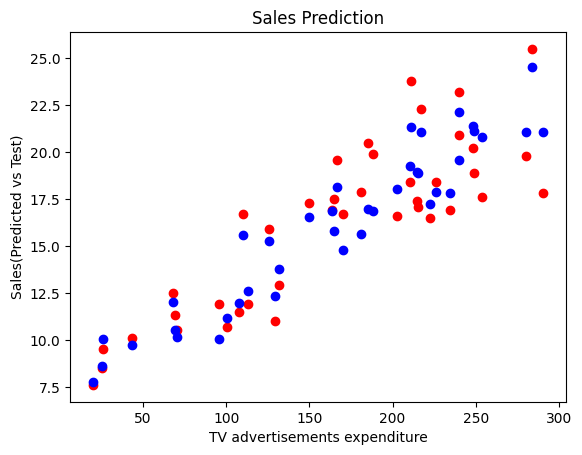

In [28]:
plt.scatter(X_test[:,0],y_test,color='red')
plt.scatter(X_test[:,0],y_pred,color='blue')
plt.title('Sales Prediction')
plt.xlabel('TV advertisements expenditure')
plt.ylabel('Sales(Predicted vs Test)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

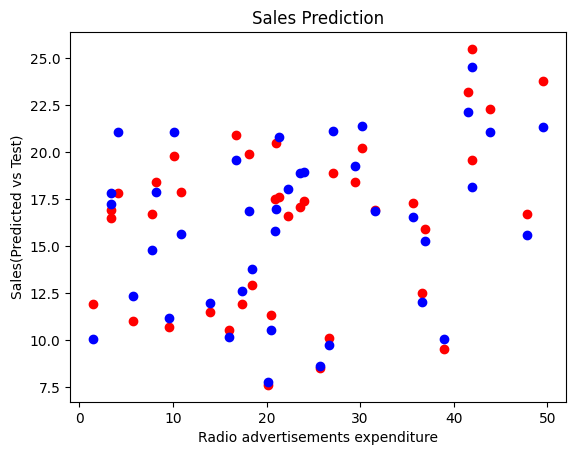

In [29]:
plt.scatter(X_test[:,1],y_test,color='red')
plt.scatter(X_test[:,1],y_pred,color='blue')
plt.title('Sales Prediction')
plt.xlabel('Radio advertisements expenditure')
plt.ylabel('Sales(Predicted vs Test)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

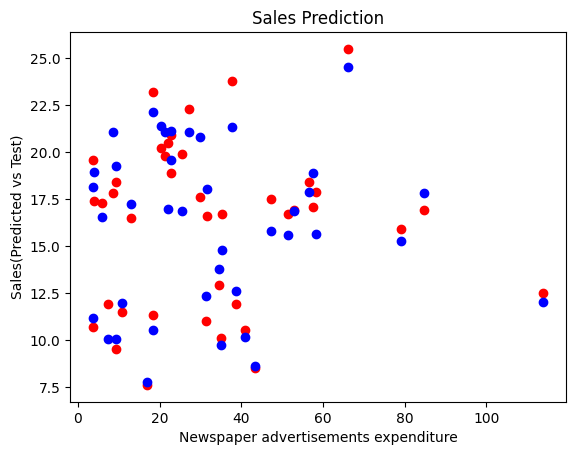

In [30]:
plt.scatter(X_test[:,2],y_test,color='red')
plt.scatter(X_test[:,2],y_pred,color='blue')
plt.title('Sales Prediction')
plt.xlabel('Newspaper advertisements expenditure')
plt.ylabel('Sales(Predicted vs Test)')
plt.show

**Here, we have plotted the Predicted vs actual values for the test set for each variable separately, since it's not feasible to plot the y value with 3 dependent variables on the X-axis**

**Below is a table showing the corresponding predicted value for each actual value in testing set.**

In [31]:
from sklearn.metrics import mean_squared_error
df2 = pd.DataFrame({"Actual data of testing set": y_test, "Predicted Data of Testing Set": y_pred})
print(df2)
print("Mean Squared Error for this Linear Regression is:",end=" ")
mean_squared_error(y_test,y_pred)

    Actual data of testing set  Predicted Data of Testing Set
0                         23.8                      21.328177
1                         16.6                      18.061800
2                         11.9                      10.046643
3                         19.8                      21.092913
4                         17.6                      20.785722
5                         25.5                      24.528140
6                         16.9                      16.842026
7                         17.9                      15.656230
8                         10.5                      10.138836
9                         17.1                      18.882473
10                        17.5                      15.809927
11                        11.3                      10.546378
12                        17.4                      18.934404
13                        16.7                      15.567005
14                        18.4                      17.868458
15      

2.4092185773771497

#Predicting Sales on a new data

In [32]:
X_new=np.array([[200,40,50]])
y_new=regressor.predict(X_new)
print("Predicted Sales Value is:",y_new)

Predicted Sales Value is: [19.7321937]


#Normalizing Data(Standardisation)

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:,0:]=sc.fit_transform(X_train[:,0:])
X_test[:,0:]=sc.transform(X_test[:,0:])



Splitting the data and making the Multiple Regression

In [34]:

regressor=LinearRegression()
regressor.fit(X_train,y_train)
# print(X_train)
y_pred2=regressor.predict(X_test)

In [35]:
df3 = pd.DataFrame({"Actual data of testing set": y_test, "Predicted Data of Testing Set": y_pred2})
print(df3)
print("Mean Squared Error for this Linear Regression is:",end=" ")
mean_squared_error(y_test,y_pred2)

    Actual data of testing set  Predicted Data of Testing Set
0                         23.8                      21.328177
1                         16.6                      18.061800
2                         11.9                      10.046643
3                         19.8                      21.092913
4                         17.6                      20.785722
5                         25.5                      24.528140
6                         16.9                      16.842026
7                         17.9                      15.656230
8                         10.5                      10.138836
9                         17.1                      18.882473
10                        17.5                      15.809927
11                        11.3                      10.546378
12                        17.4                      18.934404
13                        16.7                      15.567005
14                        18.4                      17.868458
15      

2.4092185773771484

Comparing the MSE for the previous plotted Linear regression and the one with normalised data, we conclude that there is no change in the performance of the model, since, the MSE in both the cases is same

# Sales Prediction with only Radio and Newspaper

In [36]:
# Data preprocessing
X=df.iloc[:,2:-1].values #Here we start from column index 2 thus leaving TV dependency
y=df.iloc[:,-1].values
# Handling missing values
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,0:4])
X[:,0:4]=imputer.transform(X[:,0:4])
# Splitting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
# Regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred3=regressor.predict(X_test)
# Actual vs predicted
df4= pd.DataFrame({"Actual data of testing set": y_test, "Predicted Data of Testing Set": y_pred3})
print(df4)
print("Mean Squared Error for this Linear Regression is:",end=" ")
mean_squared_error(y_test,y_pred3)

    Actual data of testing set  Predicted Data of Testing Set
0                         23.8                      18.108968
1                         16.6                      14.747601
2                         11.9                      11.960856
3                         19.8                      13.163789
4                         17.6                      14.609434
5                         25.5                      17.503157
6                         16.9                      16.102707
7                         17.9                      13.652541
8                         10.5                      14.087804
9                         17.1                      15.188576
10                        17.5                      14.751277
11                        11.3                      14.385048
12                        17.4                      14.651201
13                        16.7                      18.041424
14                        18.4                      13.317998
15      

19.082567784662967

**As we can observe, the if we only take Radio and Newspaper advertising into consideration, the Sales Prediction depletes, as now the MSE is very high as compared to the one previously found**